In [1]:
from riskyneuroarousal.utils.load_data import load_behavioral_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Visualizing the gambles for each condition

In [2]:
gains = np.arange(5, 41)
losses = np.arange(5, 21)
gains_equalIndifference = np.arange(10, 41, 2)
gains_equalRange = np.arange(5, 21, 1)
losses_both = np.arange(5, 21, 1)

In [3]:
samples = []
condition = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        # valueIndifference, valueRange = np.nan, np.nan
        if gain in gains_equalIndifference and loss in losses_both:
            if gain >= 2*loss:
                valueIndifference = 1
            else:
                valueIndifference = 0
        else:
            valueIndifference = np.nan
        if gain in gains_equalRange and loss in losses_both:
            if gain >= 2*loss:
                valueRange = 1
            else:
                valueRange = 0
        else:
            valueRange = np.nan
        
        gains_plot.append(gain)
        gains_plot.append(gain)
        losses_plot.append(loss)
        losses_plot.append(loss)
        samples.append(valueIndifference)
        samples.append(valueRange)
        condition.append("equalIndifference")
        condition.append("equalRange")

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples, "condition": condition})

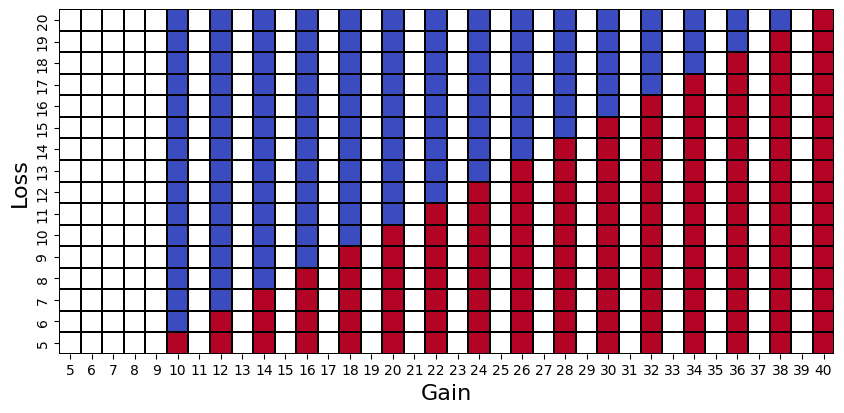

In [7]:
plt.figure(figsize=(10, 10))
hmap_data = df.query("condition == 'equalIndifference'").groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Response Time'}, square=True, linewidths=0.2, linecolor='black', cbar = False)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [19]:
def PT_value(gain, loss, lambda_ = 1, rho = 1):
    return gain**rho - lambda_ * loss**rho

In [46]:
lambda_= 0.5
rho=2
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        if PT_value(gain, loss, lambda_=lambda_, rho=rho) > 0:
            value = 1
        else:
            value = 0
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

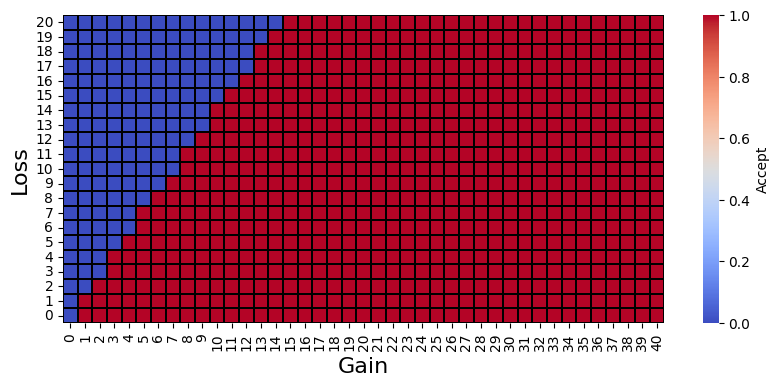

In [47]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'Accept'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
# Less risk seeking, more loss averse

In [62]:
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        value = np.log(loss/gain)
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

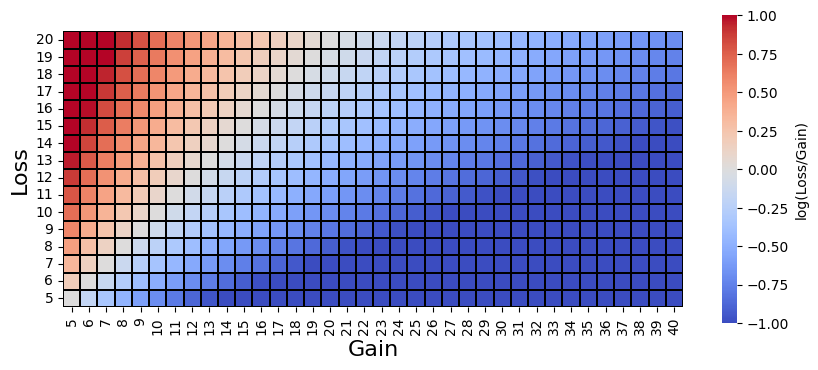

In [63]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'log(Loss/Gain)'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Set range of cbar to -1, 1
ax.collections[0].set_clim(-1, 1)
# Increase font size of labels and ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [53]:
samples = []
gains_plot = []
losses_plot = []
for gain in gains:
    for loss in losses:
        value = np.square(np.log(loss/gain))
        

        gains_plot.append(gain)
        losses_plot.append(loss)
        samples.append(value)

df = pd.DataFrame({"gain": gains_plot, "loss": losses_plot, "sampled": samples})

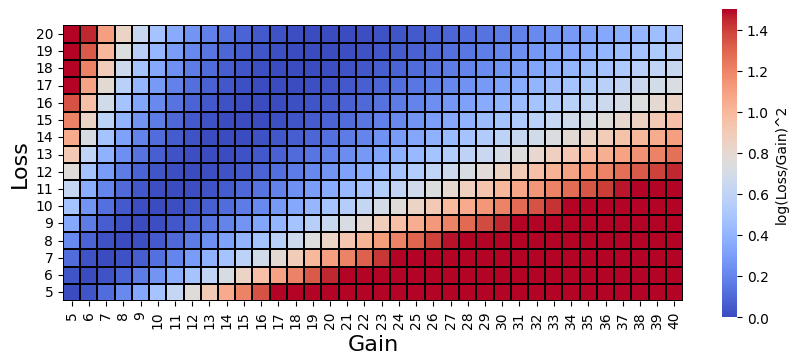

In [59]:
plt.figure(figsize=(10, 4))
hmap_data = df.groupby(['loss', 'gain'])['sampled'].mean().unstack()
# Reverse the order of gain
hmap_data = hmap_data.iloc[::-1]
ax = sns.heatmap(hmap_data, cmap='coolwarm', cbar_kws={'label': 'log(Loss/Gain)^2'}, square=True, linewidths=0.2, linecolor='black', cbar = True)
plt.xlabel("Gain", fontsize=16)
plt.ylabel("Loss", fontsize=16)
# Increase font size of labels and ticks
ax.collections[0].set_clim(0, 1.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [2]:
data = load_behavioral_data(min_RT=0.2)

In [3]:
data["gainoverloss"] = data["gain"] / data["loss"]

In [4]:
data["cumulative_max_gain"] = data.groupby("sub")["gainoverloss"].cummax()

In [5]:
data

,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial,gainoverloss,cumulative_max_gain
0,1,1,equalIndifference,14,6,2.388,1,3.0,weakly_accept,1,2.333333,2.333333
1,1,1,equalIndifference,34,14,2.289,1,4.0,strongly_accept,2,2.428571,2.428571
2,1,1,equalIndifference,34,13,1.873,1,4.0,strongly_accept,3,2.615385,2.615385
3,1,1,equalIndifference,10,10,1.457,0,2.0,weakly_reject,4,1.000000,2.615385
4,1,1,equalIndifference,12,19,1.973,0,1.0,strongly_reject,5,0.631579,2.615385
...,...,...,...,...,...,...,...,...,...,...,...,...
27643,124,4,equalRange,7,14,1.235,0,1.0,strongly_reject,252,0.500000,4.000000
27644,124,4,equalRange,5,9,1.236,0,1.0,strongly_reject,253,0.555556,4.000000
27645,124,4,equalRange,5,15,1.030,0,1.0,strongly_reject,254,0.333333,4.000000
27646,124,4,equalRange,12,18,1.029,0,1.0,strongly_reject,255,0.666667,4.000000


In [9]:
# For each subject, we will compute the max gain they have seen from a trial
data["cumulative_max_gain"] = data.groupby("sub")["gain"].cummax()
data["cumulative_max_loss"] = data.groupby("sub")["loss"].cummax()

In [33]:
# Define the window size
window_size = 300

data["cumulative_max_gain"] = data.groupby("sub")["gain"].rolling(window_size, min_periods = 1).max().reset_index()["gain"]
data["cumulative_max_loss"] = data.groupby("sub")["loss"].rolling(window_size, min_periods = 1).max().reset_index()["loss"]

In [36]:
data

,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial,gainoverloss,cumulative_max_gain,cumulative_max_loss,collect
0,1,1,equalIndifference,14,6,2.388,1,3.0,weakly_accept,1,2.333333,14.0,6.0,2.333333
1,1,1,equalIndifference,34,14,2.289,1,4.0,strongly_accept,2,2.428571,34.0,14.0,2.428571
2,1,1,equalIndifference,34,13,1.873,1,4.0,strongly_accept,3,2.615385,34.0,14.0,2.428571
3,1,1,equalIndifference,10,10,1.457,0,2.0,weakly_reject,4,1.000000,34.0,14.0,2.428571
4,1,1,equalIndifference,12,19,1.973,0,1.0,strongly_reject,5,0.631579,34.0,19.0,1.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27643,124,4,equalRange,7,14,1.235,0,1.0,strongly_reject,252,0.500000,NaN,NaN,NaN
27644,124,4,equalRange,5,9,1.236,0,1.0,strongly_reject,253,0.555556,NaN,NaN,NaN
27645,124,4,equalRange,5,15,1.030,0,1.0,strongly_reject,254,0.333333,NaN,NaN,NaN
27646,124,4,equalRange,12,18,1.029,0,1.0,strongly_reject,255,0.666667,NaN,NaN,NaN


In [34]:
data["collect"] = data["cumulative_max_gain"] / data["cumulative_max_loss"]

<Axes: xlabel='trial', ylabel='collect'>

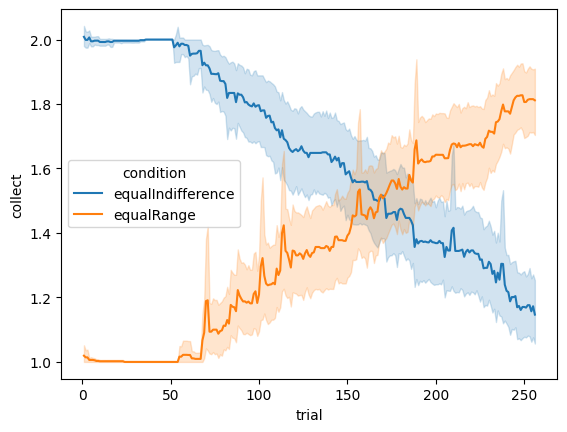

In [35]:
sns.lineplot(data, x="trial", y="collect", hue="condition")

In [8]:
data.query("sub == 3")

,sub,run,condition,gain,loss,RT,accept,response_int,participant_response,trial,gainoverloss,cumulative_max_gain
512,3,1,equalIndifference,14,14,1.247,1,4.0,strongly_accept,1,1.000000,1.000000
513,3,1,equalIndifference,38,14,1.041,1,4.0,strongly_accept,2,2.714286,2.714286
514,3,1,equalIndifference,10,18,2.803,1,3.0,weakly_accept,3,0.555556,2.714286
515,3,1,equalIndifference,16,5,0.936,1,4.0,strongly_accept,4,3.200000,3.200000
516,3,1,equalIndifference,40,12,1.142,1,4.0,strongly_accept,5,3.333333,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
763,3,4,equalIndifference,26,6,2.392,1,4.0,strongly_accept,252,4.333333,8.000000
764,3,4,equalIndifference,26,15,1.038,1,4.0,strongly_accept,253,1.733333,8.000000
765,3,4,equalIndifference,24,5,1.869,1,4.0,strongly_accept,254,4.800000,8.000000
766,3,4,equalIndifference,32,10,1.144,1,4.0,strongly_accept,255,3.200000,8.000000
